<a href="https://colab.research.google.com/github/virgo21510023/data-expert/blob/main/Latihan_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import pandas as pd

In [3]:
#load dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#ubah nama kolom

df = df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'annual_income', 'Spending Score (1-100)':'spending_score'})

#ubah data kategorik menjadi numerik
df['gender'].replace({'Female':0, 'Male':1}, inplace=True)

df

<ipython-input-4-f6b1be419744>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female':0, 'Male':1}, inplace=True)
<ipython-input-4-f6b1be419744>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Female':0, 'Male':1}, inplace=True)


,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [5]:
#delete kolom cust id dan gender

X = df.drop(['CustomerID', 'gender'], axis=1)
X

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [6]:
#import algoritma
from sklearn.cluster import KMeans

In [7]:
#membuat list dai nilai k 1-11(inertia)
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

In [9]:
#import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Inertia')

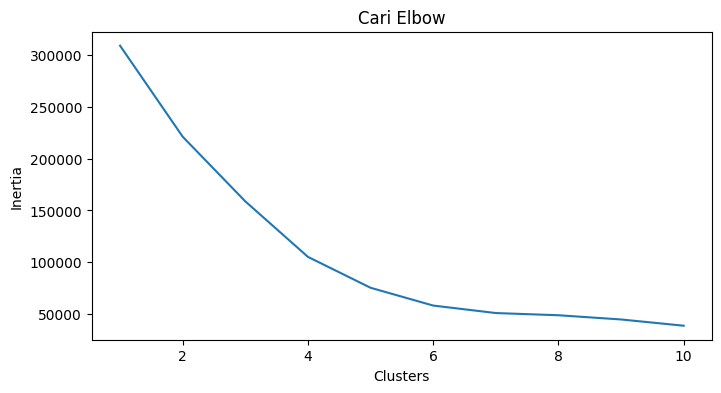

In [10]:
#membuat plot inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [11]:
#membuat objek kmeans
km5 = KMeans(n_clusters=5).fit(X)

#menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
X

,age,annual_income,spending_score,Labels
0,19,15,39,1
1,21,15,81,3
2,20,16,6,1
3,23,16,77,3
4,31,17,40,1
...,...,...,...,...
195,35,120,79,0
196,45,126,28,4
197,32,126,74,0
198,32,137,18,4


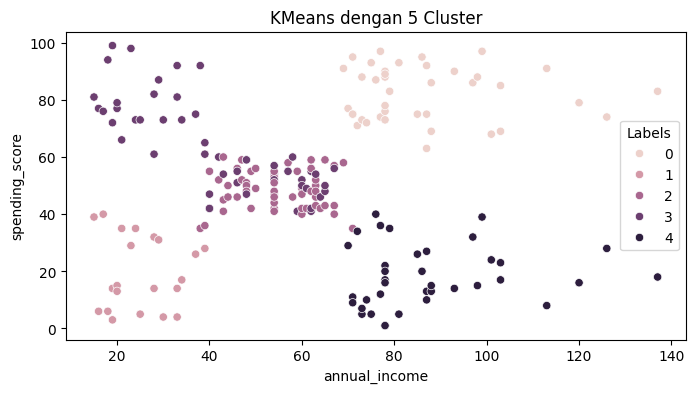

In [12]:
#membuat plot kmeans dengan 5 klaster

plt.figure(figsize=(8,4))
sns.scatterplot(x='annual_income', y='spending_score', hue='Labels', data=X)
plt.title('KMeans dengan 5 Cluster')
plt.show()